##[Problem 1] Understanding the content of the competition

1. What kind of company is Home Credit?
   Home Credit is a non-bank financial institution that provide a
   positive and safe borrowing experience for the underserved population
2. What is expected in this competition?
   This competition aims to build a predictive model using
   statistical and machine learning methods to determine which
   clients are capable of repayment
3. What are the benefits companies can gain by predicting this?
   The benefits are :
   - Offer loans to  more clients who have insufficient or non-existent credit histories
   - Reduce the tax of recjection
   - Reduce financial losses due to unpaid loans.



In [15]:
import pandas as pd
df=pd.read_csv('application_train.csv');
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Head     SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0       

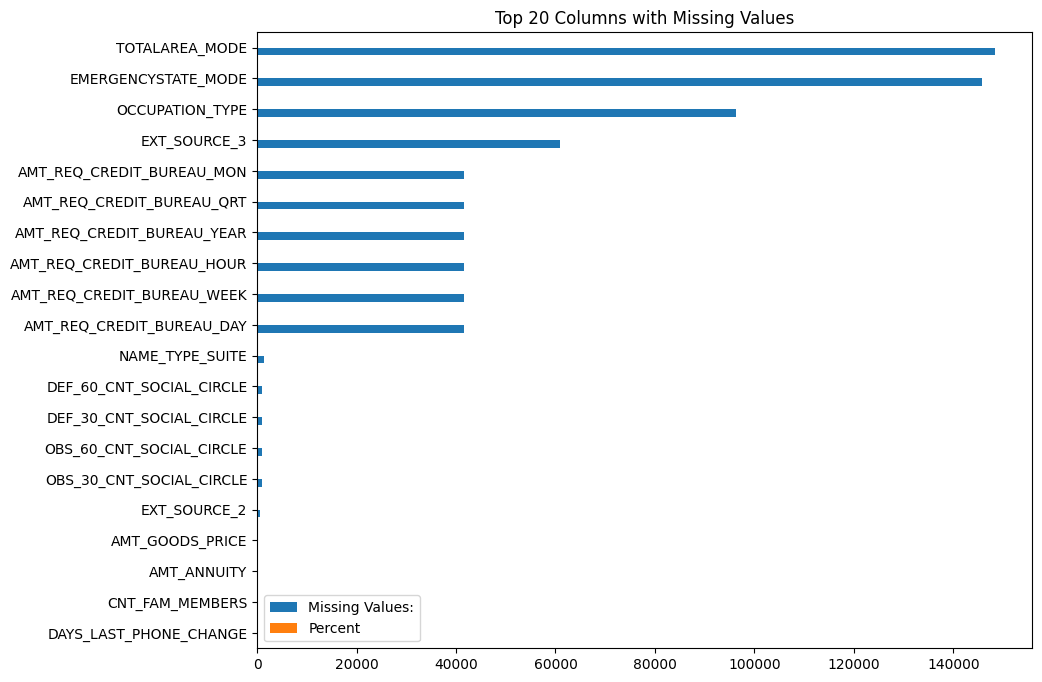

In [16]:
#[Problem 2] Understanding the overview of data
import matplotlib.pyplot as plt
print('Head ',df.head())
print('info ',df.info())
print('describe ',df.describe())

miss_values=df.isnull().sum()
miss_values=miss_values[miss_values>0].sort_values(ascending=True)
miss_percen=(miss_values/len(df))*100
missing_df=pd.DataFrame({'Missing Values:':miss_values,'Percent':miss_percen})
missing_df
missing_df.head(20).plot(kind='barh', figsize=(10, 8), title='Top 20 Columns with Missing Values')
plt.show()

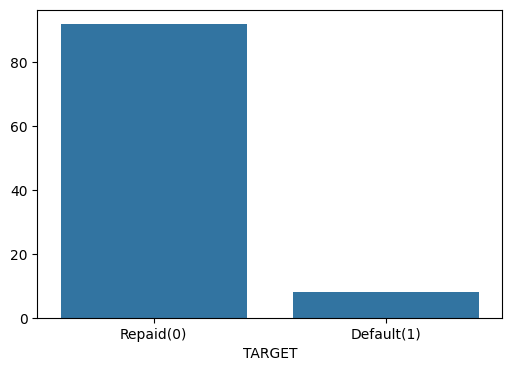

In [8]:
import seaborn as sns
target_counts=df['TARGET'].value_counts(normalize=True)*100

plt.figure(figsize=(6,4))
sns.barplot(x=target_counts.index,y=target_counts.values)
plt.xticks([0,1],['Repaid(0)','Default(1)'])
plt.show()

TARGET is the label column that tells us the loan repayment status of the client.
Target 0 (load was repaid) I called Class Repaid 
Targer 1 (load was not repaid) I called Class Default

#[Problem 3] Defining issues
1. How reliable is the transactional information for prediction?
2. Does lower income correlate with a higher default rate?
3. Do people with extremely high or low income behave differently?


AMT_CREDIT       0.000000
AMT_ANNUITY      0.003902
DAYS_EMPLOYED    0.000000
dtype: float64


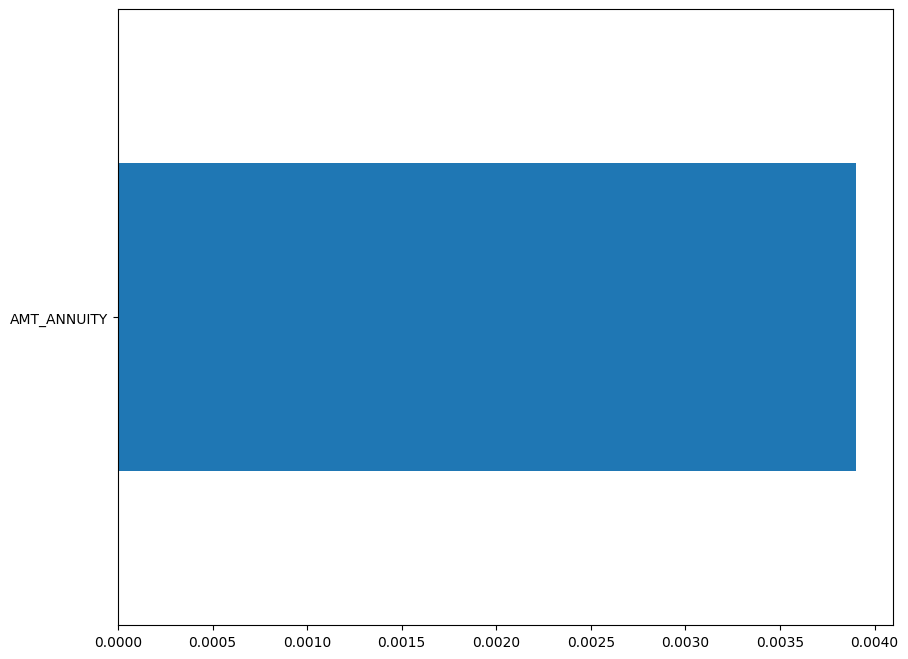

In [19]:
#[Problem 4] Data exploration
#here i would like to see the missing values rate 
inf_transactional = df[['AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_EMPLOYED']]
missing_inf_transactional= inf_transactional.isnull().mean() * 100
print(missing_inf_transactional)

missing_inf_transactional=missing_inf_transactional[missing_inf_transactional>0]

missing_inf_transactional.head().plot(figsize=(10,8),kind='barh')
plt.show()

In [21]:
#here i would to like to see whether default rate is correlate with lower income
df['INCOME_BIN'] = pd.qcut(df['AMT_INCOME_TOTAL'], q=10, duplicates='drop')  

income_default = df.groupby('INCOME_BIN')['TARGET'].mean() * 100
print(df['INCOME_BIN'])
print(income_default)

C:\Users\USER\AppData\Local\Temp\ipykernel_8904\1881833790.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_default = df.groupby('INCOME_BIN')['TARGET'].mean() * 100


INCOME_BIN
(25649.999, 81000.0]       8.190830
(81000.0, 99000.0]         8.223250
(99000.0, 112500.0]        8.719213
(112500.0, 135000.0]       8.489427
(135000.0, 147150.0]       9.000692
(147150.0, 162000.0]       8.640746
(162000.0, 180000.0]       8.422355
(180000.0, 225000.0]       7.806467
(225000.0, 270000.0]       7.040136
(270000.0, 117000000.0]    6.137477
Name: TARGET, dtype: float64

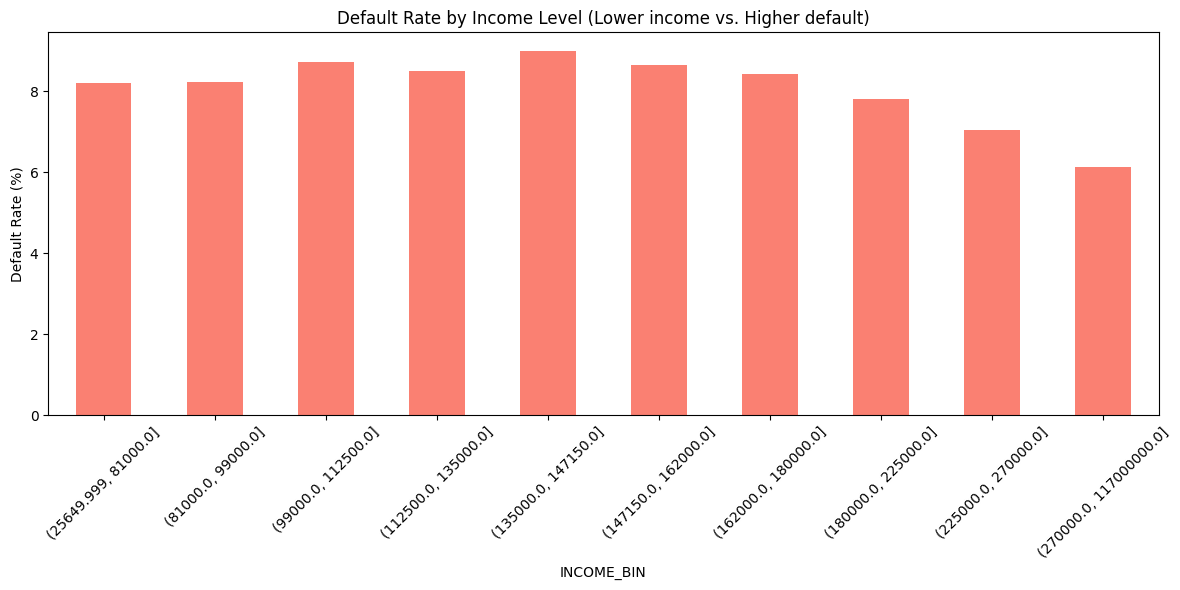

In [22]:
plt.figure(figsize=(12, 6))
income_default.plot(kind='bar', color='salmon')
plt.ylabel('Default Rate (%)')
plt.title('Default Rate by Income Level (Lower income vs. Higher default)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Although there is a general trend where people with lower income tend to have higher default rates and people with higher income tend to have lower default rates, an interesting pattern emerges:
- Individuals in the middle-income range actually show the highest default rate, even higher than the lowest-income group.
- This suggests that the relationship between income and default risk is not purely linear. While low income can be a risk factor, middle-income individuals might face other financial pressures (such as higher loans or lifestyle costs) that lead to a higher default rate compared to the poorest group.

In [25]:
low_income = df[df['AMT_INCOME_TOTAL'] < df['AMT_INCOME_TOTAL'].quantile(0.10)]
high_income = df[df['AMT_INCOME_TOTAL'] > df['AMT_INCOME_TOTAL'].quantile(0.90)]

low_default_rate = low_income['TARGET'].mean() * 100
high_default_rate = high_income['TARGET'].mean() * 100

print(f"Default R. Lowest 10%  {low_default_rate:.2f}%")
print(f"Default R. - Highest 10% {high_default_rate:.2f}%")


Default R. Lowest 10%  7.93%
Default R. - Highest 10% 6.14%


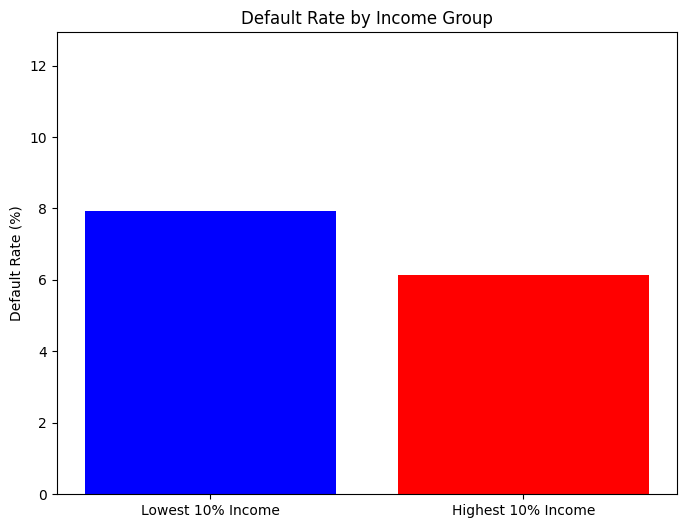

In [30]:
plt.figure(figsize=(8, 6))
income_groups = ['Lowest 10% Income', 'Highest 10% Income']
default_rates = [low_default_rate, high_default_rate]

plt.bar(income_groups, default_rates, color=['blue', 'red'])

plt.title('Default Rate by Income Group')
plt.ylabel('Default Rate (%)')
plt.ylim(0, max(default_rates) + 5)

plt.show()

[Problem 5] (Advanced task) Posting to Notebooks

The link : https://www.kaggle.com/code/cindyzacarias/credit-information-analysis
